In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# The Task

Use the a classification algorithm to make a prediction on the 'quality' column of the dataset.
according to notebook description the author recommends to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.



In [2]:
wines_df = pd.read_csv("./winequality-red.csv")

In [3]:
wines_df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Columns Description:

1. fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)


2. volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste


3. citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines


4. residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet


5. chlorides - the amount of salt in the wine


6. free sulfur dioxide - it prevents microbial growth and the oxidation of wine


7. total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine


8. density - the density of water is close to that of water depending on the percent alcohol and sugar content


9. pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale


10. sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant


11. alcohol - the percent alcohol content of the wine


12. quality (score between 0 and 10)


In [4]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wines_df.isnull().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3> From the info command We can see that the columns only have numeric values and there are no nulls. </h3>
<h3> I wanted to look at the correlation between the features and the quality </h3>

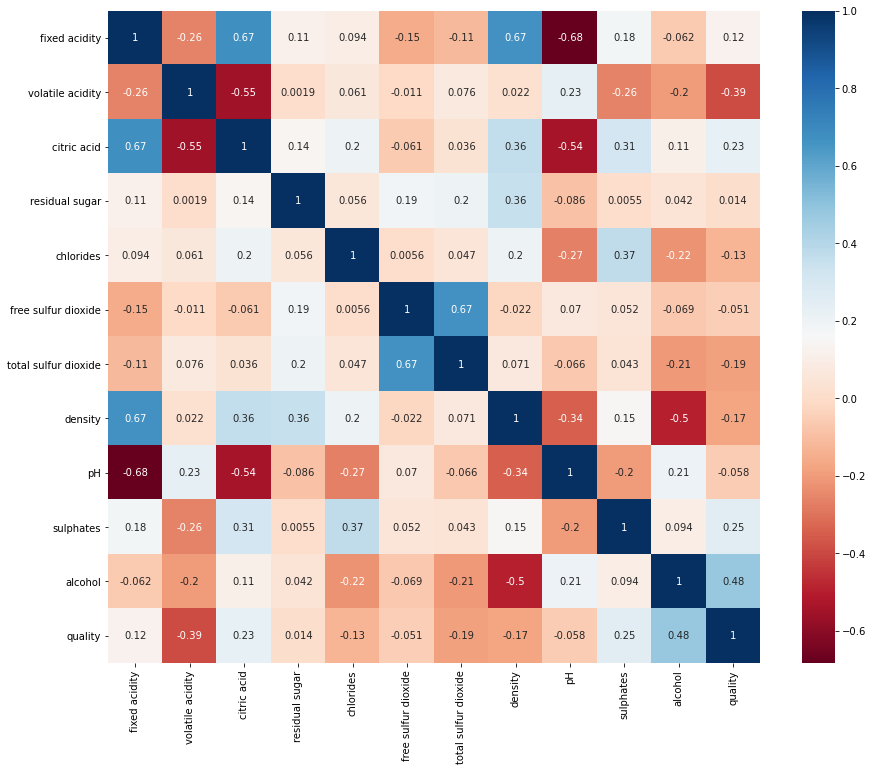

In [6]:

colormap = plt.cm.RdBu

sns.heatmap(wines_df.corr(), annot=True, cmap=colormap,square=True )

fig = plt.gcf()
fig.set_size_inches(15, 12)


plt.show()

I have decided to check what is the percentage of wines that have a quality which is >= 7

In [7]:
good_wines = wines_df.loc[wines_df["quality"]>=7]["quality"].size

percentage_from_total = good_wines/ wines_df.index.size


percentage_from_total

0.1357098186366479

### checked the percentage wines with quality greater than 6 in the data


[5 6 7 4 8 3]


<AxesSubplot:>

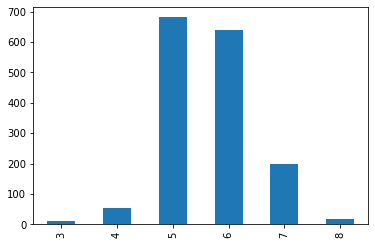

In [8]:
print(wines_df["quality"].unique())

wines_df["quality"].value_counts().sort_index().plot.bar()

In [9]:
wines_df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

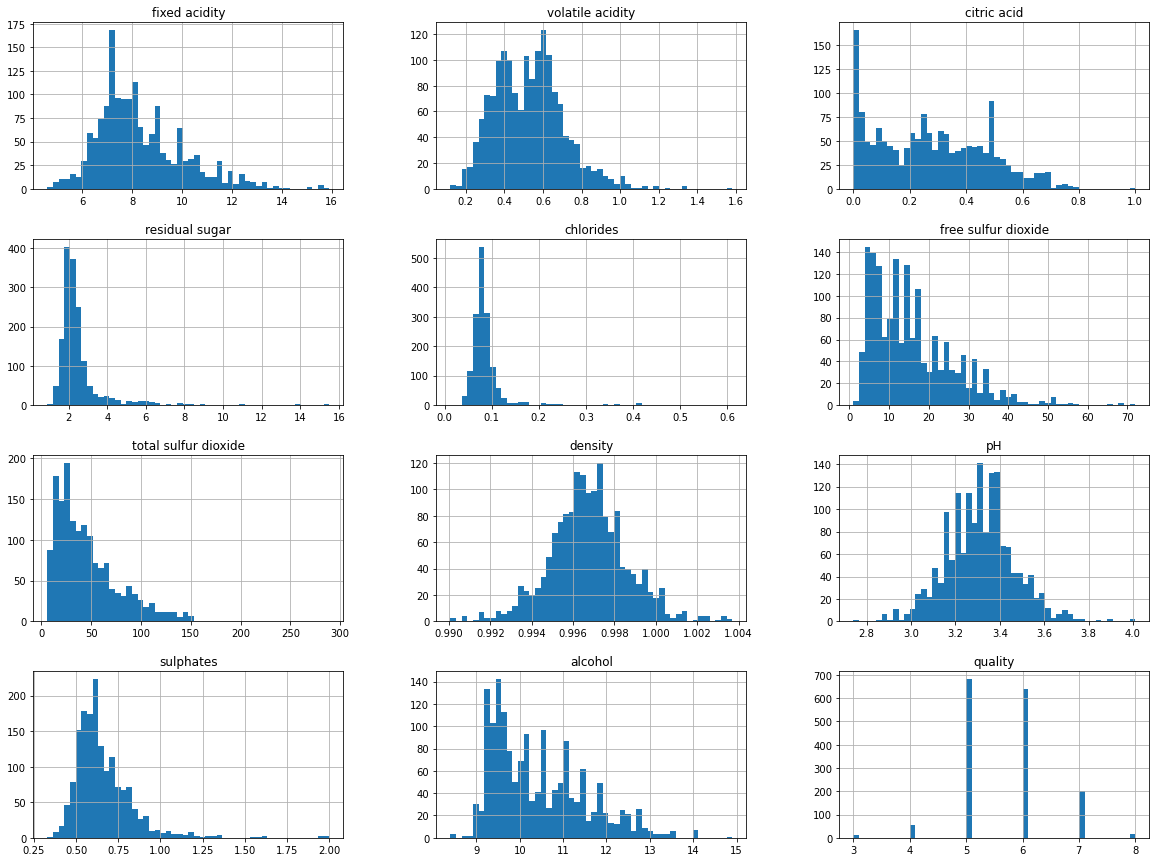

In [10]:
wines_df.hist(bins=50, figsize=(20,15))
plt.show()

**one of the tasks related to the data is to predict the wines with scores that are greater than 6, I use the binarizer to transform the values in the quality column accordingly**

In [11]:
binerizer = preprocessing.Binarizer(threshold=6)

binerized_quality = binerizer.transform(wines_df[["quality"]])

wines_binarized_quality = wines_df.drop(columns = ["quality"])

wines_binarized_quality["is_good"]= binerized_quality


wines_binarized_quality.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


<h3>plotting the relation between the quality and the new "is_good" column to see how the good wines are distributed compared to the bad wines</h3>

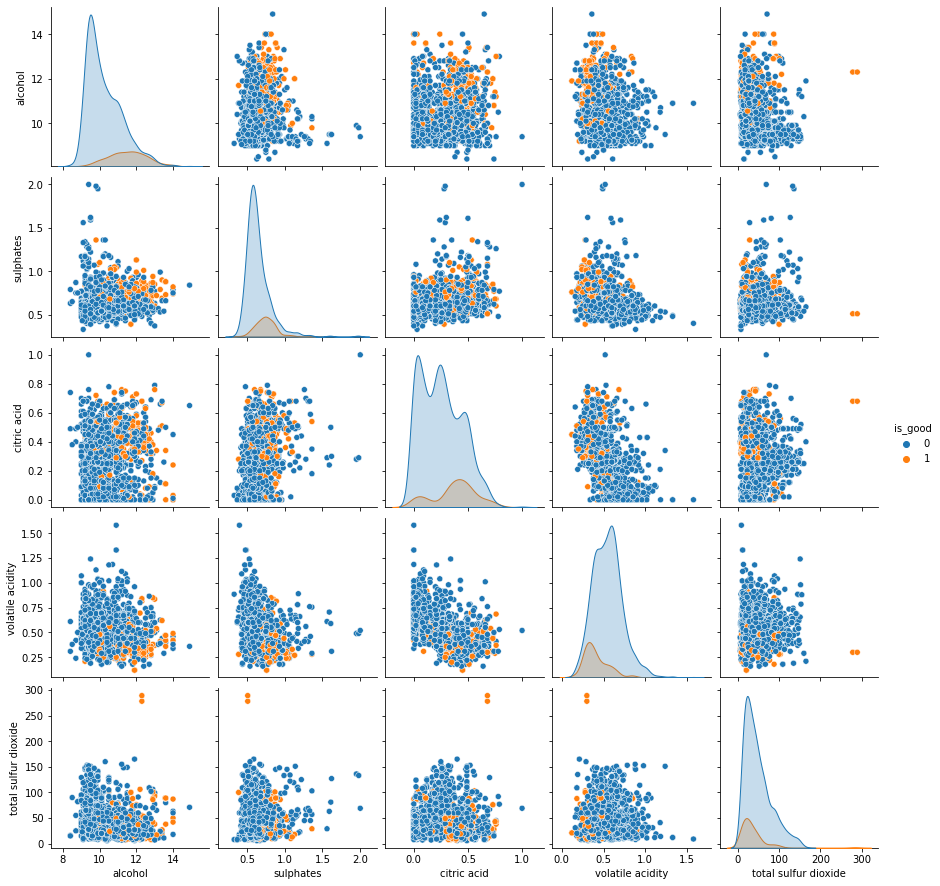

In [12]:
sns.pairplot(data=wines_binarized_quality, vars=["alcohol","sulphates","citric acid","volatile acidity", "total sulfur dioxide"],hue="is_good")

<h3>plotting low correlation features to see if they are helpful</h3>

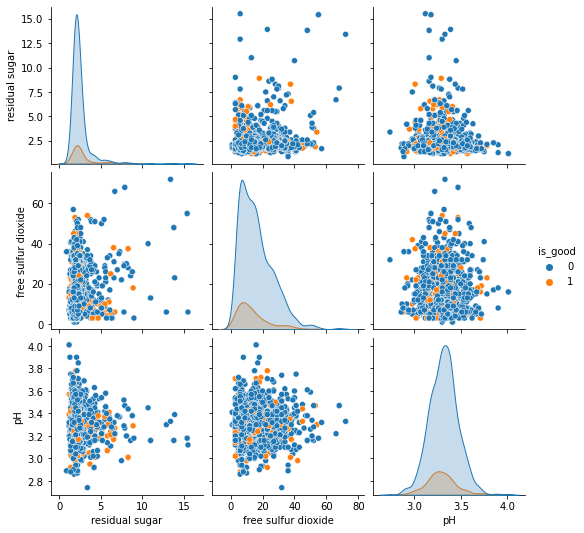

In [13]:
sns.pairplot(data=wines_binarized_quality, vars=["residual sugar","free sulfur dioxide","pH"],hue="is_good")

# Working on the Data


<h4> 
Creating a list of features that have a correlation value that is very close to 0 (correlation that is $\in [-0.1,0.1]$), I will try to use this list to see if I can improve the score in the machine learning section </h4>

In [14]:
EPSILON = 0.1

low_correlation_labels = wines_df.corr()[["quality"]].loc[(wines_df.corr()["quality"]< EPSILON) & (wines_df.corr()["quality"]> -EPSILON)].sort_values(by=["quality"],ascending=False)

print(low_correlation_labels)


                      quality
residual sugar       0.013732
free sulfur dioxide -0.050656
pH                  -0.057731


In [15]:
santinsed_wines_data = wines_binarized_quality.copy()
target_label = santinsed_wines_data['is_good']
wines_without_target = santinsed_wines_data.drop(columns=['is_good'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(wines_without_target,target_label , test_size=0.2 ,random_state=21)

x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
751,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
370,6.9,0.765,0.02,2.3,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
708,7.8,0.545,0.12,2.5,0.068,11.0,35.0,0.99600,3.34,0.61,11.6
...,...,...,...,...,...,...,...,...,...,...,...
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4
48,6.4,0.400,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2
772,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4
1231,7.8,0.815,0.01,2.6,0.074,48.0,90.0,0.99621,3.38,0.62,10.8


# I chose the standard scaler because i saw that i don't have that many outliers compared to the amount of data that i have

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Machine learning time
1. comparing between 3 classification algorithms
2. tunning each
3. conclusion on which one is the one that suits the best

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_predictions = dummy_clf.predict(x_test)

accuracy_score(dummy_predictions,y_test)


0.859375

In [18]:
knn_cls = KNeighborsClassifier()
knn_cls.fit(x_train,y_train)
prediction_on_test = knn_cls.predict(x_test)

print(accuracy_score(y_test,prediction_on_test))

knn_scores = cross_val_score(estimator = knn_cls, X = x_train, y = y_train, cv = 10,scoring='accuracy')

print(knn_scores.mean())
print(knn_scores.std())

0.909375
0.8608636811023622
0.025013664749860432


In [19]:
forest_cls = RandomForestClassifier(random_state=0)
forest_cls.fit(x_train,y_train)

prediction_on_test = forest_cls.predict(x_test)

print (accuracy_score(y_test,prediction_on_test))

forest_score = cross_val_score(estimator = forest_cls, X = x_train, y = y_train, cv = 10, scoring='accuracy')
print(forest_score.mean())
print(forest_score.std())

0.9375
0.8944697342519685
0.016002166393252214


# Let's look at the feature importance to see if we optimize the data for the algorithm

In [20]:
importance_df = pd.DataFrame(list(zip(list(wines_without_target.columns),forest_cls.feature_importances_)),
                             columns = ['feature_name', 'importance'])

print(importance_df.sort_values(by=['importance']))

sorted_by_importance = importance_df.sort_values(by=['importance'])["feature_name"].array

            feature_name  importance
8                     pH    0.060055
5    free sulfur dioxide    0.061011
3         residual sugar    0.065533
4              chlorides    0.071652
0          fixed acidity    0.072435
6   total sulfur dioxide    0.080899
2            citric acid    0.087739
7                density    0.094253
9              sulphates    0.110279
1       volatile acidity    0.120198
10               alcohol    0.175946


<h3>I will try to drop the columns with low importance and see if it improves the performance of my algorithms or not </h3>

**[explanation about the scaling](https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data)**


In [21]:

def create_splits_without_features(features_to_remove):
    wines_without_low_corr = wines_binarized_quality.drop(columns=features_to_remove)

    target_label = wines_without_low_corr['is_good']
    wines_without_target = wines_without_low_corr.drop(columns=['is_good'],axis=1)

    x_train, x_test, y_train, y_test = train_test_split(wines_without_target,target_label , test_size=0.2 ,random_state=21)

    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    return x_train, x_test, y_train, y_test

In [22]:
def check_classifier_scores(x_train,y_train, classifier):
    classifier.fit(x_train,y_train)
    prediction_on_test = classifier.predict(x_test)    
    classifier_scores = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, scoring='accuracy')
    
    print(f'{accuracy_score(y_test,prediction_on_test)} - model accuracy')
    print(f'{classifier_scores.mean()} - CV mean accuracy \n')
    
    return accuracy_score(y_test,prediction_on_test)

0.909375 - model accuracy
0.8608636811023622 - CV mean accuracy 

0.9375 - model accuracy
0.8944697342519685 - CV mean accuracy 

0.8875 - model accuracy
0.8616510826771654 - CV mean accuracy 

0.925 - model accuracy
0.9030573326771654 - CV mean accuracy 

0.8875 - model accuracy
0.8639886811023623 - CV mean accuracy 

0.93125 - model accuracy
0.8952448326771654 - CV mean accuracy 

0.884375 - model accuracy
0.8741572342519686 - CV mean accuracy 

0.921875 - model accuracy
0.8991510826771654 - CV mean accuracy 

0.884375 - model accuracy
0.8835260826771654 - CV mean accuracy 

0.93125 - model accuracy
0.8999384842519685 - CV mean accuracy 



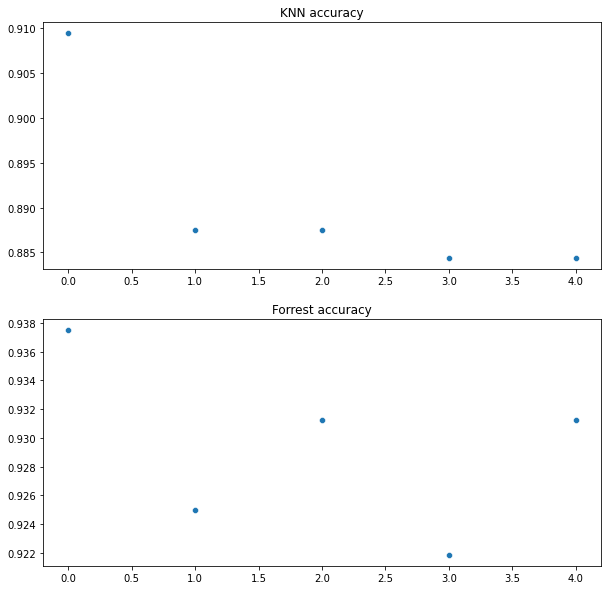

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)

features_removed = []
forest_scores = []
knn_scores = []


for idx in range(int (len(sorted_by_importance)/2)):
    features_to_remove = sorted_by_importance[:idx]
    features_removed.append(idx)    
    x_train, x_test, y_train, y_test = create_splits_without_features(features_to_remove)
    knn_scores.append(check_classifier_scores(x_train,y_train, classifier=KNeighborsClassifier()))
    forest_scores.append(check_classifier_scores(x_train,y_train, classifier=RandomForestClassifier(random_state=0)))


sns.scatterplot(x=features_removed,y=knn_scores,ax=ax1)
ax1.set_title("KNN accuracy")
sns.scatterplot(x=features_removed,y=forest_scores, ax=ax2)
ax2.set_title("Forrest accuracy")
plt.show()



<h3>there is a slight decrease for both the knn and the randomForest when i get remove the low importance feature. I decided to stay with all of them</h3>

In [24]:
x_train, x_test, y_train, y_test = create_splits_without_features([])

## Tuning The models (knn randomForest):


In [25]:
tree_param_grid = [
    
    {
     'n_estimators': [50,100,200,400],
     'max_depth':[None,30,45,100],
     'max_features': ['auto',3,4],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2,3],
     'random_state':[0]
    }
    
]


In [26]:

grid_search = GridSearchCV(
    RandomForestClassifier(),
    tree_param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=2
)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid=[{'max_depth': [None, 30, 45, 100],
                          'max_features': ['auto', 3, 4],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 3],
                          'n_estimators': [50, 100, 200, 400],
                          'random_state': [0]}],
             return_train_score=True, scoring='accuracy')

In [27]:
grid_search.best_score_

0.8975674019607844

<h3>Tunning KNN </h3>

In [28]:

knn_param_grid = [
    
    {
     'n_neighbors': list(range(3,30)),
     'weights':['uniform','distance'],
     'metric': ['euclidean','manhattan','minkowski'],
    }
    
]

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
)
grid_search_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [29]:
print(grid_search_knn.best_score_)
grid_search_knn.best_params_

0.8975735294117648


{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [30]:
final_knn_model = grid_search_knn.best_estimator_
final_knn_prediction_on_test = final_knn_model.predict(x_test)

accuracy_score(y_test,final_knn_prediction_on_test)

0.91875

In [31]:
final_forest_model = grid_search.best_estimator_
final_forest_prediction_on_test = final_forest_model.predict(x_test)

accuracy_score(y_test,final_forest_prediction_on_test)

0.925

# Summary

1. comparing against a dummy classifier
2. plotting the confusion matrix
3. plotting the classification report
4. few words

# Forest confusion matrix

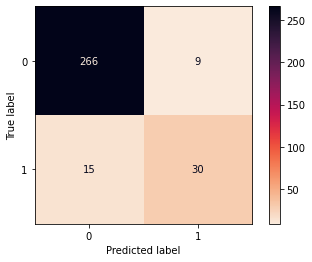

In [32]:
plot_confusion_matrix(grid_search.best_estimator_,x_test,y_test,cmap='rocket_r')

In [33]:
print(classification_report(y_test, final_forest_prediction_on_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       275
           1       0.77      0.67      0.71        45

    accuracy                           0.93       320
   macro avg       0.86      0.82      0.84       320
weighted avg       0.92      0.93      0.92       320



# KNN confusion matrix

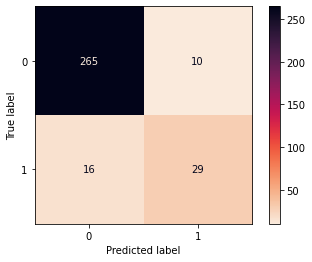

In [34]:
plot_confusion_matrix(grid_search_knn.best_estimator_,x_test,y_test,cmap='rocket_r')

In [35]:
print(classification_report(y_test, final_knn_prediction_on_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       275
           1       0.74      0.64      0.69        45

    accuracy                           0.92       320
   macro avg       0.84      0.80      0.82       320
weighted avg       0.92      0.92      0.92       320



# conclusions
we can see that the random forrest is slightly better than the KNN classifier, that is why i chose it as the best model for classifying wine quality